### 1. Model Development and Training

#### 1.1 Evaluting ML Models

When selecting a model for your problem, you don’t choose from every possible model out there, but usually focus on a set of models suitable for your problem.

Different types of algorithms require different numbers of labels as well as different amounts of compute power. 

**Non-neural network algorithms tend to be more explainable** (e.g., what features contributed the most to an email being classified as spam) than neural networks.

When considering what model to use, it’s important to consider not only the **model’s performance**, measured by metrics such as accuracy, F1 score, and log loss, but also its **other properties, such as how much data, compute, and time it needs to train, what’s its inference latency, and interpretability**. 

To keep up to date with so many new ML techniques and models, I find it helpful to monitor trends at major ML conferences such as NeurIPS, ICLR, and ICML, as well as following researchers whose work has a high signal-to-noise ratio on Twitter.

##### Six tips for model selection

1. Avoid the state of the art trap
- Researchers often only evaluate models in academic settings, which means that a **model being state of the art** often means that **it performs better than existing models on some static datasets**.
- It doesn’t mean that this model will be fast enough or cheap enough for you to implement.
- It doesn’t even mean that this model will perform better than other models on your data.

2. Start with the simplest models
- Zen of Python: simple is better than complex.
- Simplicity serves three purposes:
  1. Simpler models are easier to deploy, and deploying your model early allows you to validate that your prediction pipeline is consistent with your training pipeline.
  2. Starting with something simple and adding more complex components step-bystep makes it easier to understand your model and debug it.
  3. The simplest model serves as a baseline to which you can compare your more complex models.

3. Avoid human biases in selecting models
-  If an engineer is more excited about an architecture, they will likely spend a lot more time experimenting with it, which might result in better-performing models for that architecture.
- When comparing different architectures, it’s important to compare them under **comparable setups**. 
- Because the performance of a model architecture depends heavily on the context it’s evaluated in—e.g., the task, the training data, the test data, the
hyperparameters, etc.—**it’s extremely difficult to make claims that a model architecture is better than another architecture**. The claim might be true in a context, but unlikely true for all possible contexts.

4. Evaluate good performance now versus good performance later
- **The best model now does not always mean the best model two months from now**. 
- e.g. a tree-based model might work better now because you don’t have a ton of data yet, but two months from now, you might be able to double your amount of training data, and your neural network might perform much better.
- A simple way to **estimate how your model’s performance might change with more data** is to use **learning curves**. A learning curve of a model is a plot of its performance—e.g., training loss, training accuracy, validation accuracy—against the number of training samples it uses.
- While evaluating models, you might want to take into account their **potential for improvements** in the near future, and how easy/difficult it is to achieve those improvements.

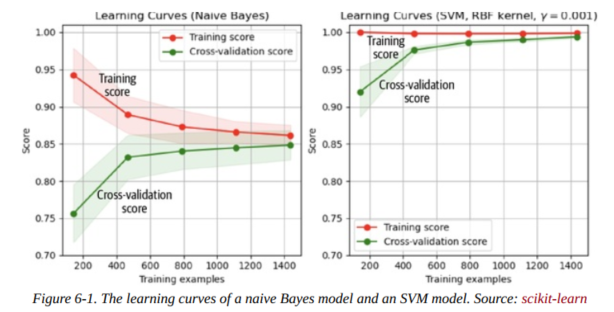

5. Evaluate trade-offs
- e.g. **False positives and false negatives tradeoff**: Reducing the number of false positives might increase the number of false negatives, and vice versa. 
- e.g. **Compute requirement and accuracy tradeoff**: A more complex model might deliver higher accuracy but might require a more powerful machine, such as a GPU instead of CPU, to generate predictions with acceptable inference latency. 
- e.g. **Interpretability and performance trade-off**: A more complex model can give a better performance, but its results are less interpretable.

6. Understand your model's assumptions
    1. Prediction assumption
      - Every model that aims to predict an output Y from an input X makes the assumption that it’s ***possible to predict Y based on X**.
    2. IID
      - Neural networks assume that the examples are **independent and identically distributed**, which means that all examples are independently drawn from the same joint distribution.
    3. Smoothness
      - Every supervised machine learning method assumes that there’s a set of functions that can **transform inputs into outputs** such that **similar inputs are transformed into similar outputs**.
      - If an input X produces an output Y, then an input close to X would produce an output proportionally close to Y
    4. Tractability
      - Let X be the input and Z be the latent representation of X. Every generative model makes the assumption that it’s **tractable to compute the probability P(Z|X)**.
    5. Boundaries
      - A linear classifier assumes that decision boundaries are linear.
    6. Conditional independence
      - A naive Bayes classifier assumes that the attribute values are independent of each other given the class.
    7. Normally distributed
      - Many statistical methods assume that data is normally distributed.

#### 1.2 Ensembles

Each model in the ensemble is called a **base learner**.

Ensembling methods are **less favored in production** because ensembles are more **complex to deploy and harder to maintain**. However, they are still common for tasks where a small performance boost can lead to a huge financial gain, such as predicting click-through rate for ads.

When creating an ensemble, the **less correlation there is among base learners, the better the ensemble will be**. Therefore, it’s common to choose very different types of models for an ensemble. For example, you might create an ensemble that consists of one transformer model, one recurrent neural network, and one gradient-boosted tree.

There are three ways to create an ensemble: **bagging, boosting, and stacking**. In addition to helping boost performance, according to several survey papers, ensemble methods such as **boosting and bagging, together with resampling, have shown to help with imbalanced datasets**.

For more great advice on how to create an ensemble, refer to the awesome ensemble guide by one of Kaggle’s legendary teams, MLWave.

##### Bagging

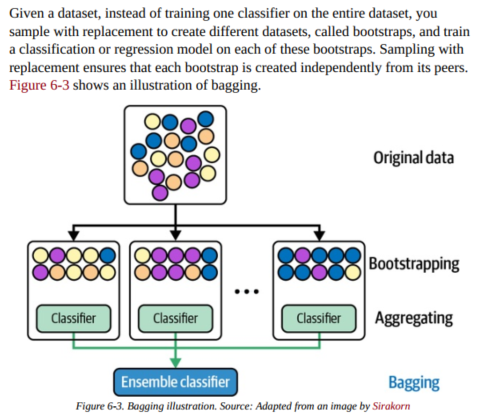

It reduces variance and helps to avoid overfitting.

1. Classification: the final prediction is decided by the majority vote of all models.
2. Regression:  the final prediction is the average of all models’ predictions.

Bagging generally **improves unstable methods**, such as neural networks, classification and regression trees, and subset selection in linear regression.

However, it can **mildly degrade the performance of stable methods** such as k-nearest neighbors.

A **random forest** is an example of bagging. A random forest is a collection of decision trees constructed by both bagging and feature randomness, where each tree can pick only from a random subset of features to use.

##### Boosting

- Convert **weak learners to strong ones**. 
- Each learner in this ensemble is trained on the **same set of samples**, but the **samples are weighted differently among iterations**. 
- As a result, **future weak learners focus more on the examples that previous weak learners misclassified**. 

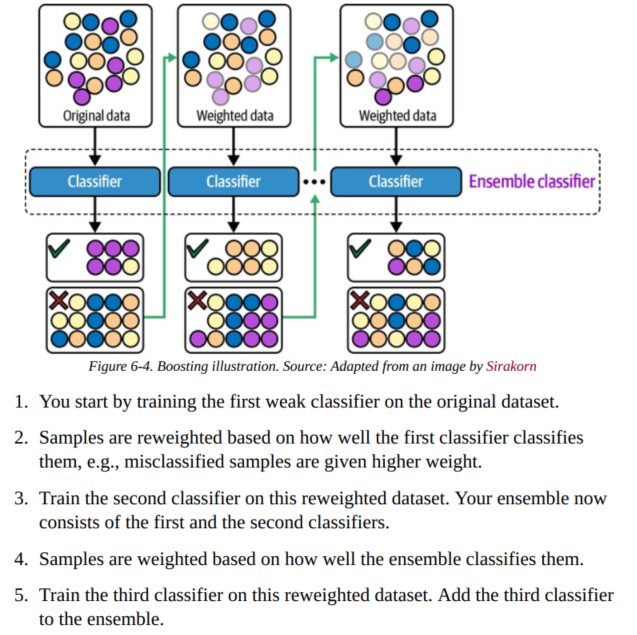

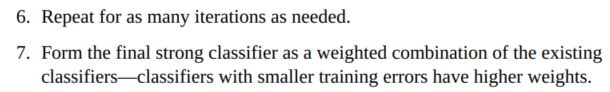

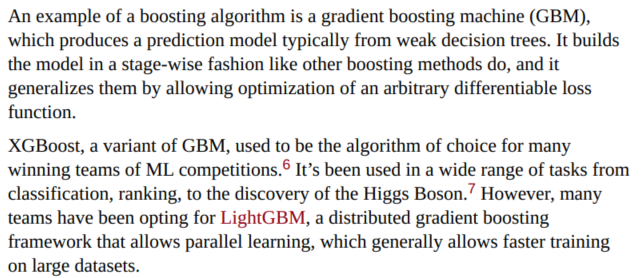

##### Stacking

Train base learners from the training data then create a **meta-learner** that **combines the outputs of the base learners to output final predictions**.

The meta-learner can be as simple as a **heuristic**: you take the majority vote (for classification tasks) or the average vote (for regression tasks) from all base learners. It can be another model, such as a logistic regression model or a linear regression model.

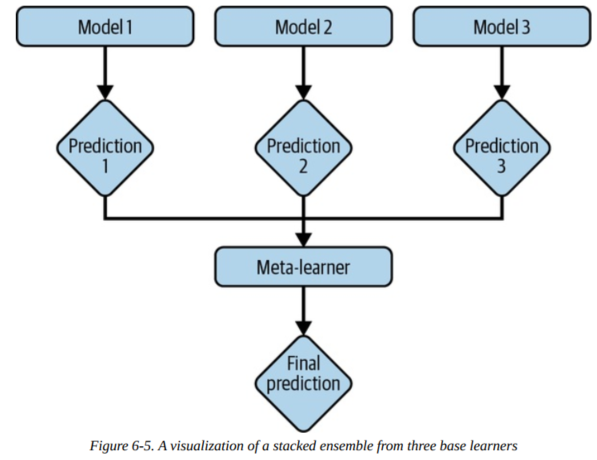

#### 1.3 Experiment Tracking and Versioning

During the model development process, you often have to experiment with many architectures and many different models to choose the best one for your problem.

It’s important to keep track of all the definitions needed to re-create an experiment and its relevant artifacts.

An **artifact** is a **file generated during an experiment**—examples of artifacts can be files that show the loss curve, evaluation loss graph, logs, or intermediate results of a model throughout a training process. 

**Experiment tracking**: the process of tracking the progress and results of an experiment.

**Versioning**: the process of logging all the details of an experiment for the purpose of possibly recreating it later or comparing it with other experiments.

Many tools originally set out to be experiment tracking tools, such as **MLflow** and **Weights & Biases**, have grown to incorporate versioning.

Many tools originally set out to be versioning tools, such as **DVC**, have also incorporated experiment tracking.

##### Experiment Tracking

Things you might want to consider tracking for each experiment during its training process:

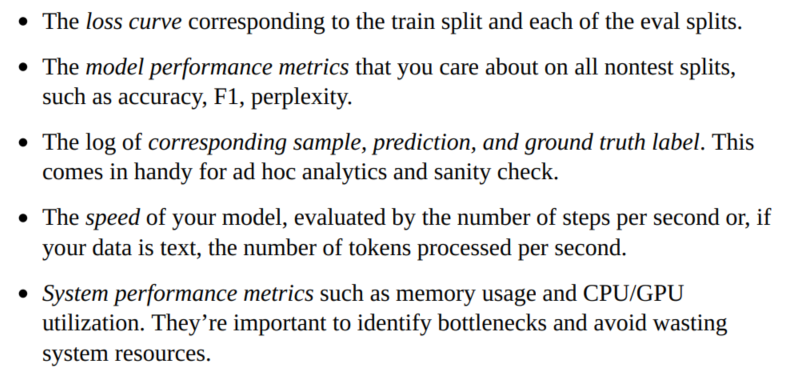

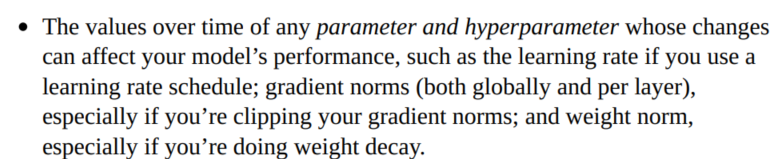

A simple way to track your experiments is to automatically **make copies of all the code files needed** for an experiment and **log all outputs with their timestamps**. 

Using third-party experiment tracking tools, however, can give you nice dashboards and allow you to share your experiments with your coworkers.

##### Versioning

ML systems are part code, part data, so you need to **not only version your code but your data as well**.

Why data versioning is challenging:
1. Data is often much larger than code, we can’t use the same strategy that people usually use to version code to version data.

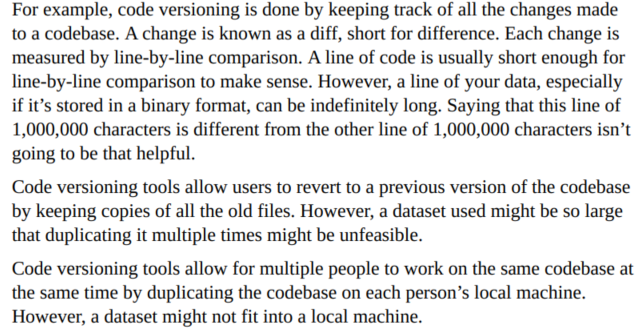

2. Confusion in what exactly constitutes a diff when we version data.

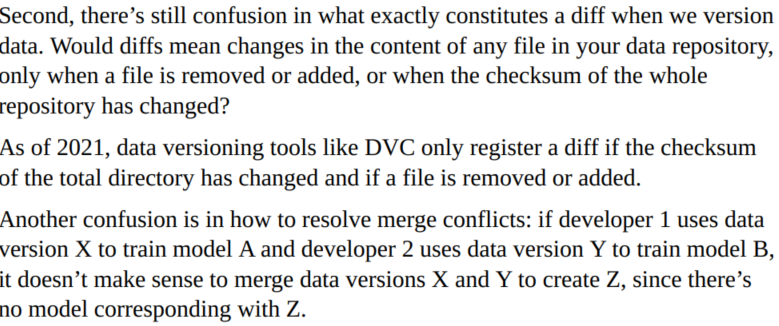

3. If you use user data to train your model, regulations like General Data Protection Regulation (GDPR) might make versioning this data complicated.
- e.g. regulations might mandate that you delete user data if requested, making it legally impossible to recover older versions of your data.

The frameworks and hardware you use might introduce **nondeterminism** to your experiment results, making it impossible to replicate the result of an experiment without knowing everything about the environment your experiment runs in.

The way we have to **run so many experiments right now** to find the best possible model is the result of us treating **ML as a black box**. Because we can’t predict which configuration will work best, we have to experiment with multiple configurations.

##### Debugging ML Models

Debugging ML models can be especially frustrating for the following three reasons:
1. ML models fail silently.
- The loss decreases as it should. The correct functions are called. The predictions are made, but the predictions are wrong. The developers don’t notice the errors. And worse, users don’t either and use the predictions as if the application was functioning as it should.
2. Even when you think you’ve found the bug, it can be frustratingly slow to validate whether the bug has been fixed.
- When making changes to an ML model, you might have to retrain the model and wait until it converges to see whether the bug is fixed, which can take hours. In some cases, you can’t even be sure whether the bugs are fixed until the model is deployed to the users.
3. Debugging ML models is hard because of their cross-functional complexity.
- There are many components in an ML system: data, labels, features, ML algorithms, code, infrastructure, etc. These different components might be owned by different teams. 
- For example, data is managed by data engineers, labels by subject matter experts, ML algorithms by data scientists, and infrastructure by ML engineers or the ML platform team. - When an error occurs, it could be because of any of these components or a combination of them, making it hard to know where to look or who should be looking into it.

Here are some of the things that might cause an ML model to fail:

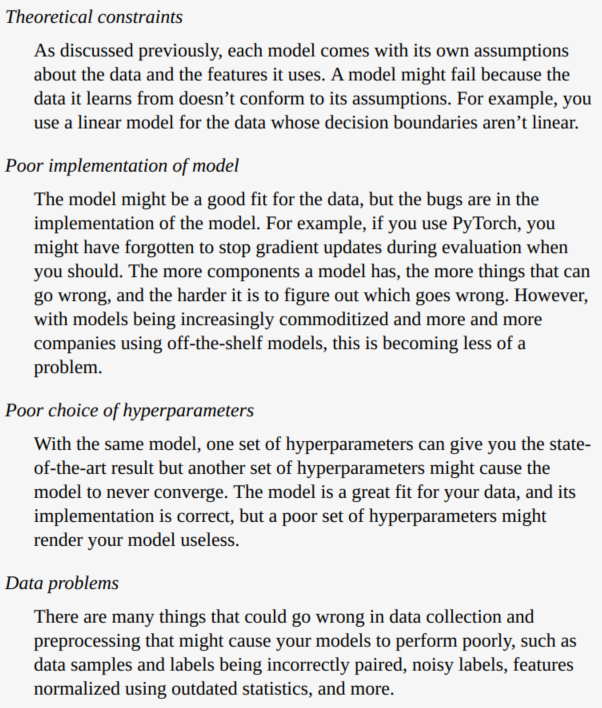

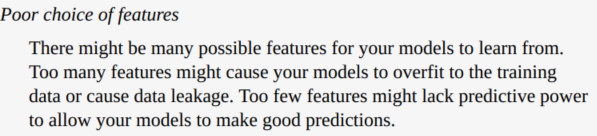

Tried-and-true ML debugging techniques:

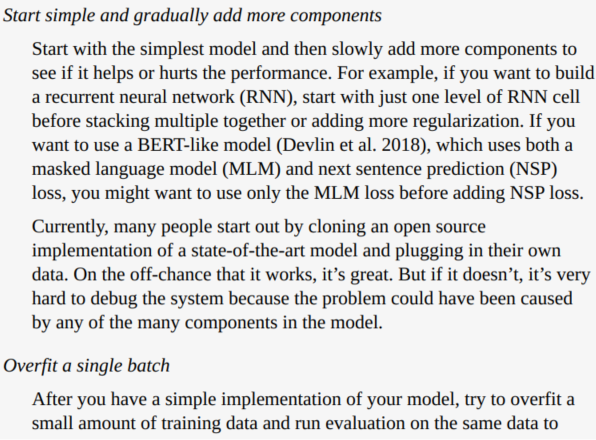

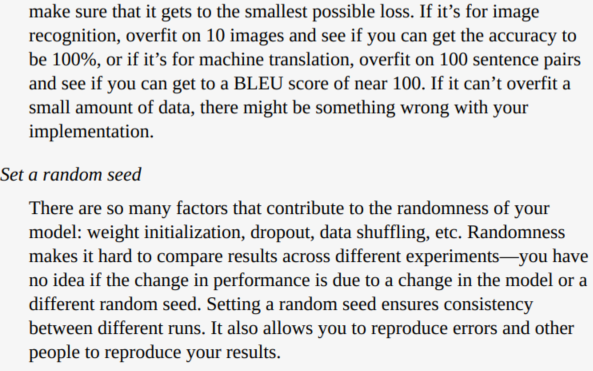

#### 1.4 Distributed Training

##### Data parallelism

##### Model parallelism

#### 1.5 AutoML

##### Soft AutoML: Hyperparameter tuning

##### Hard AutoML: Architecture search and learned optimizer

##### Four Phases of ML Model Development

### 2. Model Offline Evaluation

Ideally, the evaluation methods should be the same during both development and production. 

But in many cases, the ideal is impossible because during development, you have ground truth labels, but in production, you don’t.

In this section, we’ll discuss methods to evaluate your model’s performance before it’s deployed.

#### 2.1 Baselines

1. Random baseline
- If our model just **predicts at random**, what’s the expected performance? 
- The predictions are generated at random following a specific distribution, which can be the **uniform distribution or the task’s label distribution**.

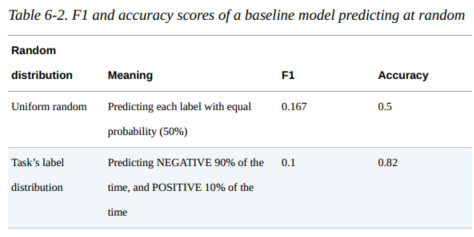

2. Simple heuristic
-  If you just make predictions based on **simple heuristics**, what performance would you expect?
- e.g. For example, if you want to build a ranking system to rank items on a user’s newsfeed with the goal of getting that user to spend more time on the newsfeed, how much time would a user spend if you just rank all the items in reverse chronological order, showing the latest one first?

3. Zero rule baseline
- Special case of the simple heuristic baseline when your baseline **model always predicts the most common class**.
- e.g. For the task of recommending the app a user is most likely touse next on their phone, the simplest model would be to recommend their most frequently used app. If this simple heuristic can predict the next app accurately 70% of the time, any model you build has to outperform it significantly to justify the added complexity.

4. Human baseline
- To know how your model performs compared to **human experts**. 
- e.g. if you work on a self-driving system, it’s crucial to measure your system’s progress compared to human drivers, because otherwise you might never be able to convince your users to trust this system. 
- Even if your system isn’t meant to replace human experts and only to aid them in improving their productivity, it’s still important to know in what scenarios this system would be useful to humans.

5. Existing solutions
- Compare your new models to **existing solutions**.
- Your ML model **doesn’t always have to be better than existing solutions** to be useful. 
- A model whose performance is a little bit inferior can still be useful if it’s much easier or cheaper to use.

#### 2.2 Evaluation Methods

In academic settings, when evaluating ML models, people tend to fixate on their performance metrics. 

However, in production, we also want our models to be robust, fair, calibrated, and overall make sense. 

##### Perturbation tests

The **inputs** your models have to work with in **production** are often **noisy** compared to inputs in development.

To get a sense of how well your model might perform with noisy data, you can **make small changes to your test splits to see how these changes affect your model’s performance**. 

You might want to choose the model that **works best on the perturbed data** instead of the one that works best on the clean data.

The **more sensitive your model is to noise, the harder it will be to maintain it**, since if your users’ behaviors change just slightly, such as they change their phones, your model’s performance might degrade. It also makes your model **susceptible to adversarial attack**.

##### Invariance tests

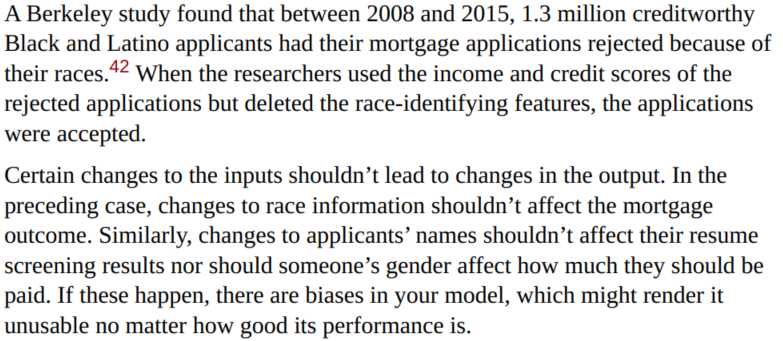

To avoid these biases, one solution is to do the same process that helped the Berkeley researchers discover the biases: **keep the inputs the same but change the sensitive information to see if the outputs change**. 

Better, you should **exclude the sensitive information from the features used to train the model** in the first place.

##### Directional expectation tests

**Certain changes to the inputs** should, however, **cause predictable changes in outputs**.

For example, when developing a model to predict housing prices, keeping all the features the same but increasing the lot size shouldn’t decrease the predicted price, and decreasing the square footage shouldn’t increase it. 

If the **outputs change in the opposite expected direction**, your **model might not be learning the right thing**.

##### Model calibration

Imagine that someone makes a prediction that something will happen with a probability of 70%. What this prediction means is that out of all the times this prediction is made, the predicted outcome matches the actual outcome 70% of the time.

If a model predicts that team A will beat team B with a 70% probability, and out of the 1,000 times these two teams play together, team A only wins 60% of the time, then we say that this **model isn’t calibrated**. 

**A calibrated model** should predict that team A wins with a 60% probability.

Two examples to show why model calibration is important:

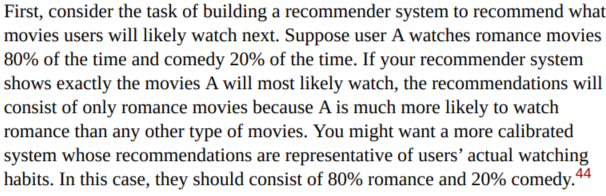

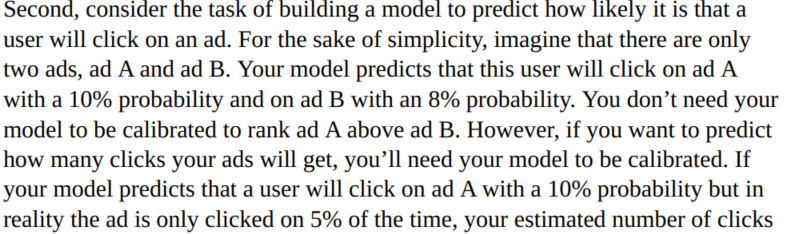

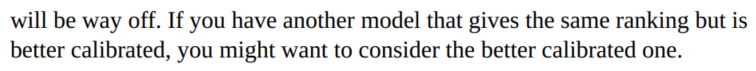

How to measure a model's calibration:

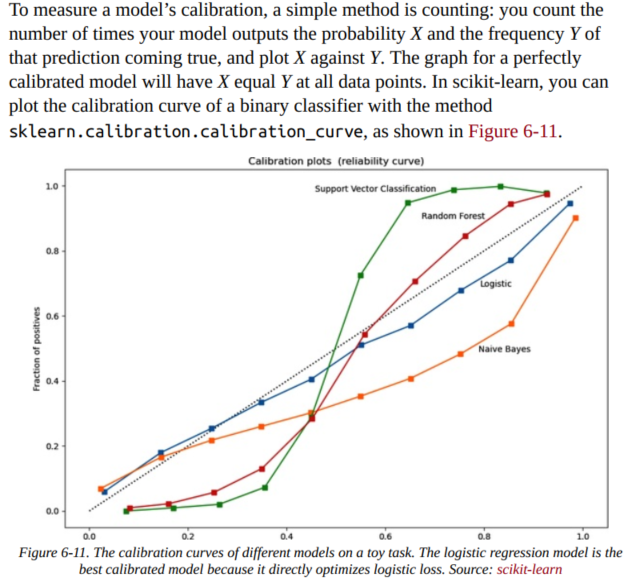

How to calibrate models:

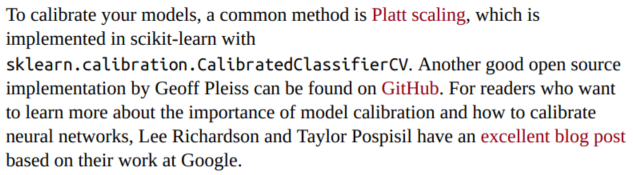

##### Confidence measurement

Indiscriminately showing all a model’s predictions to users, even the predictions that the model is unsure about, can, at best, cause annoyance and make users lose trust in the system.

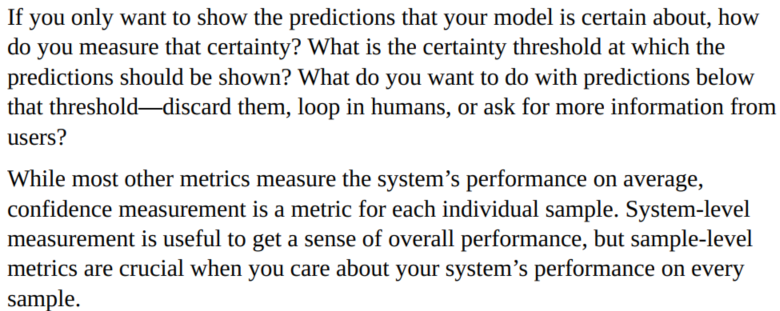

##### Slice-based evaluation

**Slicing**: to separate your data into subsets and look at your model’s performance on each subset separately.

A common mistake that I’ve seen in many companies is that they are focused too much on coarse-grained metrics like overall F1 or accuracy on the entire data and not enough on sliced-based metrics. 

Two problems: 
1. **Model performs differently on different slices** of data **when the model should perform the same**.

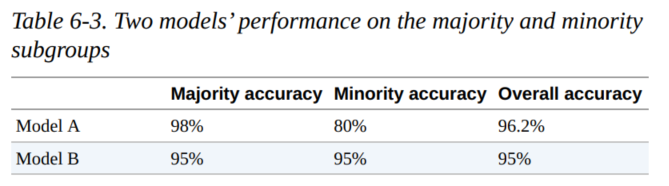

If a company focuses only on overall metrics, they might go with model A. They might be very happy with this model’s high accuracy until, one day, their end users discover that this model is biased against the minority subgroup because the minority subgroup happens to correspond to an underrepresented demographic group.

2. **Model performs the same on different slices** of data **when the model should perform differently**.
- Some subsets of data are more critical.
- When you build a model for user churn prediction (predicting when a user will cancel a subscription or a service), paid users are more critical than nonpaid users. Focusing on a model’s overall performance might hurt its performance on these critical slices.

**Simpson's paradox**: a phenomenon in which a trend appears in several groups of data but disappears or reverses when the groups are combined.
- This means that model B can perform better than model A on all data together, but model A performs better than model B on each subgroup separately.

Consider model A’s and model B’s performance on group A and group B as shown in Table 6-4. Model A outperforms model B for both group A and B, but when combined, model B outperforms model A.

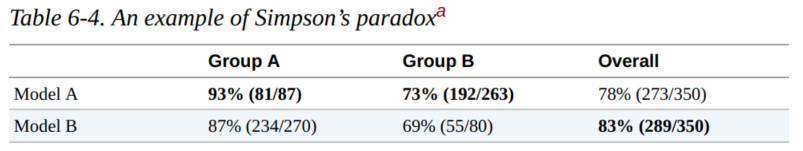

The point here is that **aggregation can conceal and contradict actual situations**. 

To make informed decisions regarding what model to choose, **we need to take into account its performance not only on the entire data, but also on individual slices**. 

Slicing approaches:

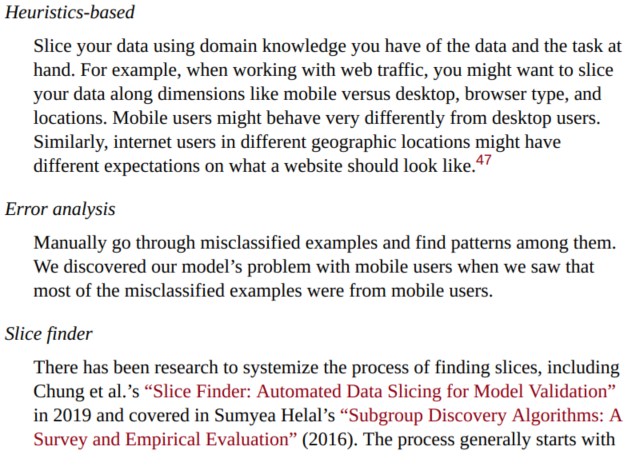

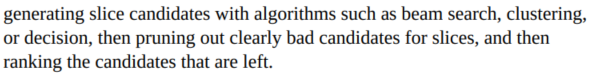